<a href="https://colab.research.google.com/github/mdaugherity/PythonGuide/blob/Random-Numbers/RandomNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Numbers**
Links

*   Overview: https://numpy.org/doc/stable/reference/random/index.html
*   Random Generator (rng): https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng
*   Integers: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html
*   Normal Distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html#numpy.random.Generator.standard_normal



# Short Problem Statement

Want to generate random numbers? We can do random integers, random arrays, decimal points, or gaussian distributed numbers. Generating random numbers is great for making practice problems, testing code, or just for fun.



# Quick Copy-and-Paste Example

In [3]:
import numpy as np
import numpy.random as npr
rng = npr.default_rng()

#Generate a random nxm matrix of single digit integers
n = 5 #rows
m = 4 #colums
low = 1 #lower bound, included
high = 10 #upper bound, excluded
a = rng.integers(low,high,size=(n,m))
print(a)

[[4 2 2 5]
 [3 8 3 1]
 [5 8 6 2]
 [1 5 4 8]
 [4 6 4 5]]


# Pseudo Random Seeds

The Random Number Generators,RNGs, are deterministic sequences and can be reproduced by specifying a seed integer to derive its initial state.

By default, with no seed provided, default_rng will seed the RNG from nondeterministic data from the operating system and therefore generate different numbers each time.

In [5]:
rng1=np.random.default_rng()
rng2=np.random.default_rng()
print(rng1.random())
print(rng1.random())
print(rng2.random())

0.8092088886563737
0.558513959044702
0.5815928182435651


When a seed is explicitly provided, it initializes the PRNG to a specific state. This allows for reproducibility, which is crucial in scenarios like debugging, simulations, or testing.

The pseudo-random sequences will be independent for all practical purposes. Seeds should be large positive integers. default_rng can take positive integers of any size.

In [198]:
rng1 = np.random.default_rng(12345)
rng2 = np.random.default_rng(12345)
print(rng1.random())
print(rng2.random())

0.22733602246716966
0.22733602246716966


Its recommended to use very large, unique numbers to ensure that your seed is different from anyone else’s. This is good practice to ensure that your results are statistically independent from theirs unless you are intentionally trying to reproduce their result.

A convenient way to get such a seed number is to use secrets.randbits to get an arbitrary 128-bit integer.

In [205]:
import secrets
b = secrets.randbits(128)  # may vary
print('seed =',b)

rng1 = np.random.default_rng(b)
print(rng1.random(2))

rng2 = np.random.default_rng(b)
print(rng2.random(2))

seed = 113080083889546716434958209497535209690
[0.48162987 0.56743209]
[0.48162987 0.56743209]


It's important to note that PRNGs, are not truly random. If someone knows the algorithm and the seed, they can reproduce or predict the sequence. Therefore, they may not be suitable for security-critical purposes, like generating cryptographic keys, where true randomness is required.

#Gaussian Distribution

A Gaussian Distribution, also known as a Normal Distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

In a standard normal distribution, the mean is zero and the standard deviation is 1. All normal distributions are symmetrical, but not all symmetrical distributions are normal. The graph of a normal distribution takes the shape of a bell curve, which is seen below.


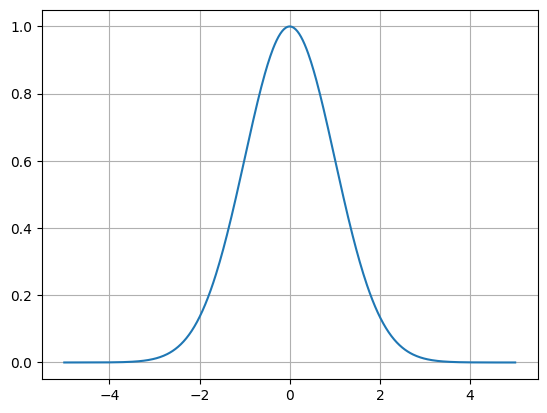

In [6]:
# @title
import matplotlib.pyplot as plt
def gaussian(x):
  return np.exp(-(x**2)/2)
x = np.linspace(-5,5,500)
y = gaussian(x)
plt.plot(x,y)
plt.grid()
plt.show()

Gaussian Distributions are very important in probability theory and statistics.

For more reading, follow this link:
https://en.wikipedia.org/wiki/Normal_distribution

# Examples

##Random Numbers [0,1)

In [ ]:
value = rng.random() #single random float
print(f'A random number from [0,1) is {value}')

A random number from [0,1) is 0.5823165314827898


In [ ]:
n = 2 #number of rows
m = 3 #number of colums
array = rng.random(size=(n,m)) # n by m array of random floats
print(f'A random {n}x{m} array with values from [0,1) is:')
print(array)

A random 2x3 array with values from [0,1) is:
[[0.52315883 0.32895753 0.5329318 ]
 [0.71520755 0.06363572 0.04098497]]


##Random Integers from a Given Range

###Single Random Integer

In [ ]:
high = 7 #upper limit
value = rng.integers(high) #single random integer, default lower limit of 0 and excluding upper limit
print(f'A random integer from [0,{high}) is {value}.')

A random integer from [0,7) is 4.


In [ ]:
low, high = 4, 7 #lower and upper limit
value = rng.integers(low,high, endpoint=True) #single random integer, set lower limit and including upper limit
print(f'A random integer from [{low},{high}] is {value}.')

A random integer from [4,7] is 7.


###Array of Random Integers

In [ ]:
n = 5 #number of integers
low, high = -6, 3 #lower, upper limit
array = rng.integers(low, high, n,endpoint=True) # n random integers, including upper limit
print(f'A random 1x{n} array with values from [{low},{high}) is:')
print(array)

A random 1x5 array with values from [-6,3) is:
[ 3 -5 -3  2  2]


In [ ]:
n,m = 3,3 #number of rows, columns
low, high = -6, 3 #lower, upper limit
array = rng.integers(low, high, size=(n,m)) # n by m array of random integers, excluding upper limit
print(f'A random {n}x{m} array with values from [{low},{high}) is:')
print(array)

A random 3x3 array with values from [-6,3) is:
[[-5  2 -4]
 [-1  0  2]
 [ 1 -1  1]]


##Standard Normal Distributions

Mean = 0 and Standard Deviation = 1

In [ ]:
rng.standard_normal() #single random number from a standard normal distribution

1.1461393209697146

In [ ]:
rng.standard_normal(4) #1x4 array random numbers from a standard normal distribution

array([-0.95071848,  0.06253171,  0.9575858 , -0.24397056])

In [ ]:
rng.standard_normal((2,3)) #2x3 array random numbers from a standard normal distribution

array([[-0.41805789, -0.01938798, -0.29658727],
       [ 0.05303371, -0.62589176, -0.17677497]])

## Gaussian Distributed Random Numbers
With a Given Mean and Standard Deviation

###Method 1: rng.normal(mean, standard deviation, size = ...)

In [ ]:
mu = 32 #mean
sd = 7 #standard deviation

rng.normal(mu, sd) #single random number from a gaussian distribution

27.353724502015847

In [ ]:
rng.normal(mu, sd, size=(2,3)) #2x3 array of random numbers from a gaussian distribution

array([[35.09818496, 32.01577419, 30.28321524],
       [29.75970245, 26.00346413, 33.23929144]])

###Method 2: mu + sigma * rng.standard_normal(size=...)

In [ ]:
mu = 4
sd = 3
mu + sd * rng.standard_normal((2,3)) #single random number from a gaussian distribution

array([[ 3.26272097,  1.61086099, -0.15989544],
       [ 1.11542604,  9.93778418,  2.91680652]])

In [ ]:
n = 24 #number of values
s = mu + sd * rng.standard_normal(n) #n random numbers from a gaussian distribution
print(s)

[-2.73140635  3.1330136   4.84874071 -0.11269904  1.38337608 -6.76728483
 -0.71370085  0.79900072  9.26589611  1.77396454  2.64202048  8.4548441
 -2.25539032  4.00519164  3.16986126  4.75810342 -4.63173587  5.08156952
 -0.35289801 -4.57499281 -2.22613669  0.86698734  2.04760326  4.27593763]


###Plotting the Histogram of the Random Samples

along with the probability desnity function

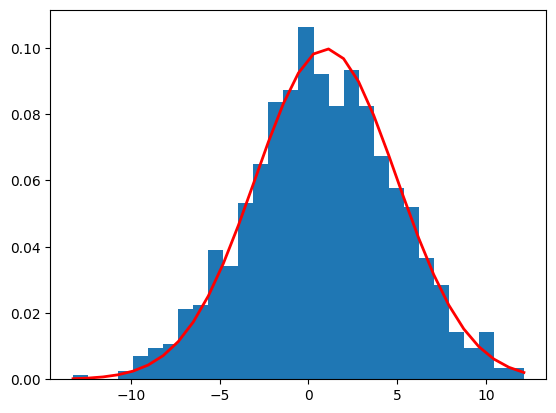

In [ ]:
mu = 1
sd = 4
s = rng.normal(mu, sd, 1000) #random sample of 1000 values

import matplotlib.pyplot as plt
count, bins, _ = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sd**2) ),
         linewidth=2, color='r')
plt.show()

# Common Errors
*And how to fix them*

##1. Make sure your properly import your packages. You should include this code before you can access the Numpy Random Generator Library.

In [1]:
rng.random()

NameError: name 'rng' is not defined

In [ ]:
import numpy as np
rng = np.random.default_rng()

In [ ]:
rng.random()

0.22602354073080866

##2. Endpoint is a boolian, you can only mark it as True or False. It defaults to false if endpoint is excluded.

In [ ]:
 rng.integers(-10,10, endpoint=T)

NameError: name 'T' is not defined

In [ ]:
 rng.integers(-10,10, endpoint=True)

-7

##3. rng.integers requires an upper limit, unlike rng.random which has set limits

In [ ]:
rng.integers(size=(2,3))

TypeError: integers() takes at least 1 positional argument (0 given)

In [ ]:
rng.integers(5,size=(2,3))

array([[4, 1, 0],
       [0, 1, 0]])

##4. For standard normal and gaussian distributions, the standard distribution can not be negative.

In [ ]:
rng.normal(-4,-2)

ValueError: scale < 0

In [ ]:
rng.normal(-4,2)

-6.5196897365629685